This project is a Python adaptation of
[Michel de Lara Scilab code](https://cermics.enpc.fr/scilab_new/site/Tp/Economics/newsvendor/index.html) and have academic purposes.

Authors: Andres Rubiano, Jhoan Tenjo, Juan galvis.



# 1 The newsvendor problem (integer formulation)

Each morning, the newsvendor must decide how many copies $u \in \{1, 2,…,u^{♯}\}$ of the day’s paper to order. The variable u is called control.

During the day, the newsvendor will meet an unknown demand $w  \in \{1,2,...,w^{♯}\}$ . The variable w is called uncertainty.

The newsvendor faces an economic tradeoﬀ:

- He pays the unitary purchasing cost c per copy, when he orders stock;

- He sells a copy at price p;

- if he remains with an unsold copy, it is worthless (perishable good).

Therefore, the newsvendor’s costs are (where w is a possible value of the demand)

$$j(u,w) = cu-p\min\{u,w\}$$

The newsvendor’s payoﬀ is $−j(u,w)$.

Now, we introduce a random variable W, where $W : Ω →\{1, 2,…,w^{♯}\}$. Here, $Ω$ is an underlying probability space, equipped with a probability $ℙ$. We suppose that the newsvendor knows the probability distribution $\mathbb{P}_{W}$ of the demand $W$.

Thus equipped, we consider the stochastic optimization problem of expected costs minimization:

$$\min_{w  \in \{1,2,...,w^{♯}\}} J(u) = \mathbb{E}_{\mathbb{P}}[j(u,W)]$$


In [3]:
import numpy as np

# Demand

wsharp = 100;  # No larger, else the Poisson distribution cannot be computed
wflat = 1;
demand = np.zeros((1,wsharp));
for i in range(wsharp):
    demand[0][i] = i+1;

# Control

control = np.zeros((1,wsharp+1));
for i in range(wsharp+1):
    control[0][i] = i+1;

# Criterion / costs 

cc = 1;
pp = 10*cc;

# cc=1; 
# pp=1.1*cc; 

# avoid that cc/pp is the inverse of an integer when the distribution of demand is uniform

ones_demand = np.zeros((1,wsharp));
for i in range(wsharp):
    ones_demand[0][i] = 1;
    
ones_control = np.zeros((1,wsharp+1));
for i in range(wsharp+1):
    ones_control[0][i] = 1;
    
costs = np.matmul(cc*np.transpose(control),ones_demand) - pp*np.minimum(np.matmul(np.transpose(ones_control),demand),np.matmul(np.transpose(control),ones_demand));

# One row by control, one column by demand


We will consider diﬀerent demand distributions.

# 1.1 The demand distribution is uniform

First, we suppose that the demand distribution ℙW is uniform as follows.

In [4]:
probab = ones_demand;
probab = probab/np.sum(probab);

# Questions 1

- [1] Draw a histogram of the random demand W. 


- [1+1] In the Python code above, what does the matrix costs represent? (What do you ﬁnd at the intersection of a row and of a column?) Explain in detail why we have that criterion = probab*np.transpose(costs) is a row vector made of the values of $J (u) = 𝔼_{ℙ}[j(u,W )]$ for $u ∈\{1, 2,…,u^{♯}\}$? 


- [1+1] Draw the mapping $u ∈ \{1, 2,…,u^{♯}\}↦J(u)$. Thanks to the scicoslab macro min (that provides the minimum and the argmin index of a vector), give the numerical value of the decision $u^{⋆}$ (optimal order) that minimizes $u↦J(u)$. 


- [1+1] What does the vector decumprobab=1-cumsum(probab) represent? Explain your answer. Check that, in agreement with the theory, we numerically have that
    $$ℙ(W > u^{⋆} − 1) ≥ \frac{c}{p} ≥ ℙ (W > u^{⋆})$$


- [2+1] For a given value of u, explain why the random variable $j (u, W )$ can at most take the values ${j(u,1),...,j(u,u − 1),j(u,u )}$ . Give, for each of the u elements of this list, the corresponding probability that $j(u,W )$ takes this value in the list. In the end, you will provide an expression of the probability distribution of $j(u,W )$ , using probab and decumprobab. 


- [1+2] Draw histograms of the probability distribution of the random payoﬀ (the opposite of the costs) $− j(u, W )$ for $u = u^{⋆}$ (the optimal decision) and for $u = 𝔼_{ℙ}[W]$ (the naive deterministic solution consisting in ordering the mean demand $𝔼_{ℙ}[W])$. Draw the two histograms on the same picture, so that they have the same scale. Comment on the diﬀerences between the two histograms. 


- [1+1+1+2] The vector grand(365,"markov",ones(probab’)*probab,1) represents a sequence of realizations of 365 i.i.d. random variables having the same distribution than the demand $W$. Simulate and draw the trajectory of the cumulated payoﬀs of the newsvendor during one year if, every day, he orders the optimal quantity u = u⋆. Do the same for $u = 𝔼_{ℙ}[W]$ and draw it on the same picture. In what sense does the the optimal decision u = u⋆ does better than $u = 𝔼_{ℙ}[W]$? Justify in detail why the two trajectories are approximately straight lines; to what correspond the slopes?


Now, we study if the results are robusts to changes in the the ratio between the unitary purchasing cost $c$ and the selling price $p$.


- [2] Take $c < p$ with $c ≈ p$. Find the optimal decision $u^{⋆}$. Draw histograms of the probability distribution of the random payoﬀ $− j(u,W )$ for $u = u^{⋆}$ and for $u = 𝔼_{ℙ}[W]$. Simulate and draw trajectories of the corresponding cumulated payoﬀs.


- [2] Same question with $c << p$. 


- [2] Discuss. In particular, how does the optimal solution $u^{⋆}$ vary with the ratio $\frac{c}{p}$?



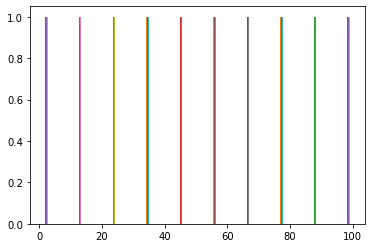

In [5]:
import matplotlib.pyplot as plt

# [1]

plt.hist(demand);
plt.show();

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1,-8.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,...,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0
2,-7.0,-17.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,...,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0
3,-6.0,-16.0,-26.0,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0,...,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0
4,-5.0,-15.0,-25.0,-35.0,-45.0,-45.0,-45.0,-45.0,-45.0,-45.0,...,-45.0,-45.0,-45.0,-45.0,-45.0,-45.0,-45.0,-45.0,-45.0,-45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,87.0,77.0,67.0,57.0,47.0,37.0,27.0,17.0,7.0,-3.0,...,-813.0,-823.0,-833.0,-843.0,-853.0,-863.0,-873.0,-873.0,-873.0,-873.0
97,88.0,78.0,68.0,58.0,48.0,38.0,28.0,18.0,8.0,-2.0,...,-812.0,-822.0,-832.0,-842.0,-852.0,-862.0,-872.0,-882.0,-882.0,-882.0
98,89.0,79.0,69.0,59.0,49.0,39.0,29.0,19.0,9.0,-1.0,...,-811.0,-821.0,-831.0,-841.0,-851.0,-861.0,-871.0,-881.0,-891.0,-891.0
99,90.0,80.0,70.0,60.0,50.0,40.0,30.0,20.0,10.0,0.0,...,-810.0,-820.0,-830.0,-840.0,-850.0,-860.0,-870.0,-880.0,-890.0,-900.0


[  -9.   -17.9  -26.7  -35.4  -44.   -52.5  -60.9  -69.2  -77.4  -85.5
  -93.5 -101.4 -109.2 -116.9 -124.5 -132.  -139.4 -146.7 -153.9 -161.
 -168.  -174.9 -181.7 -188.4 -195.  -201.5 -207.9 -214.2 -220.4 -226.5
 -232.5 -238.4 -244.2 -249.9 -255.5 -261.  -266.4 -271.7 -276.9 -282.
 -287.  -291.9 -296.7 -301.4 -306.  -310.5 -314.9 -319.2 -323.4 -327.5
 -331.5 -335.4 -339.2 -342.9 -346.5 -350.  -353.4 -356.7 -359.9 -363.
 -366.  -368.9 -371.7 -374.4 -377.  -379.5 -381.9 -384.2 -386.4 -388.5
 -390.5 -392.4 -394.2 -395.9 -397.5 -399.  -400.4 -401.7 -402.9 -404.
 -405.  -405.9 -406.7 -407.4 -408.  -408.5 -408.9 -409.2 -409.4 -409.5
 -409.5 -409.4 -409.2 -408.9 -408.5 -408.  -407.4 -406.7 -405.9 -405.
 -404. ]
The minimum value is:
-409.5
At the optimal point:
[90.]


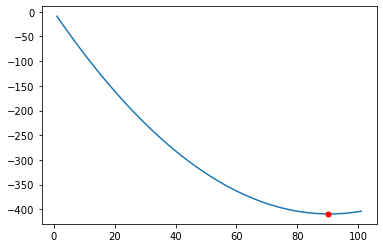

In [9]:
from IPython.display import display
import pandas as pd

# [1+1]

# Que representa esta vuelta??
costs_df = pd.DataFrame(costs);
display(costs_df);

# Explicar esta vuelta tambien
criterion = np.matmul(probab,np.transpose(costs));
print()
print(criterion[0]);

# Min value u^{\star}
min = np.amin(criterion);
u_star = np.where(criterion == min)[1]
print("The minimum value is:")
print(min)
print("At the optimal point:")
print(control[0][u_star])

# Plot u , J(u)
plt.plot(control[0],criterion[0]);
plt.plot(control[0][u_star],min,marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red");
plt.show();